In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

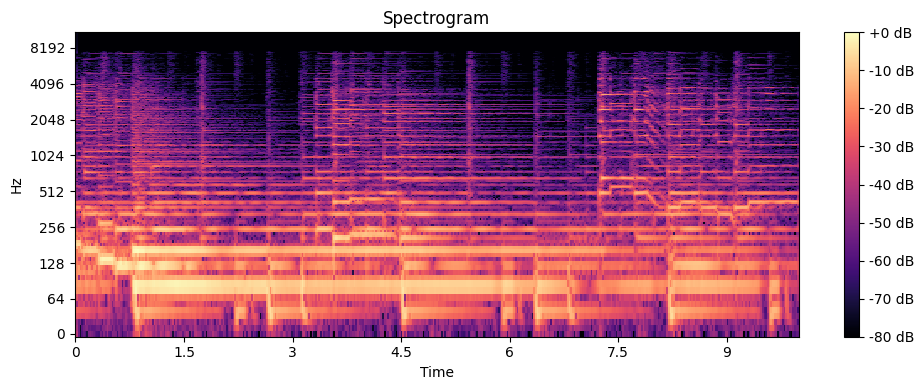

In [3]:
# Load the .wav file
filename = 'test.wav'  # replace with your .wav file
y, sr = librosa.load(filename)

# Compute the spectrogram magnitude and apply a logarithmic scale
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the log-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

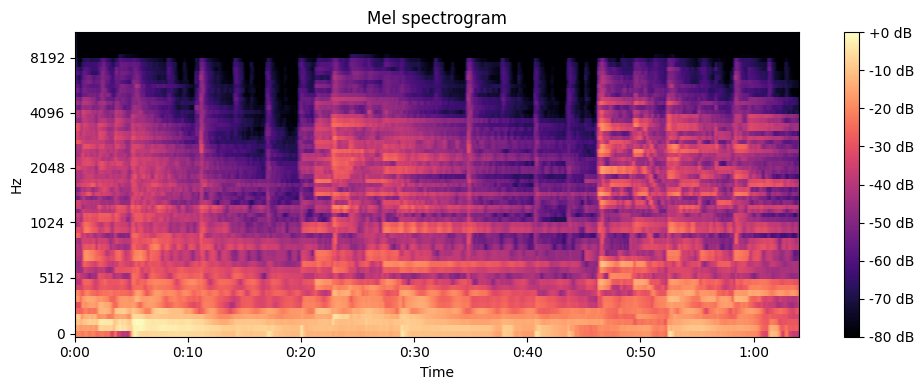

In [34]:
# Load the .wav file
filename = 'test.wav'  # replace with your .wav file
y, sr = librosa.load(filename)

# Compute a Mel-scaled spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, hop_length = 80)

# Convert to log scale (dB). We'll use the peak power as reference.
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [35]:
log_mel_spectrogram.shape

(64, 2757)

In [7]:
y.shape

(220500,)

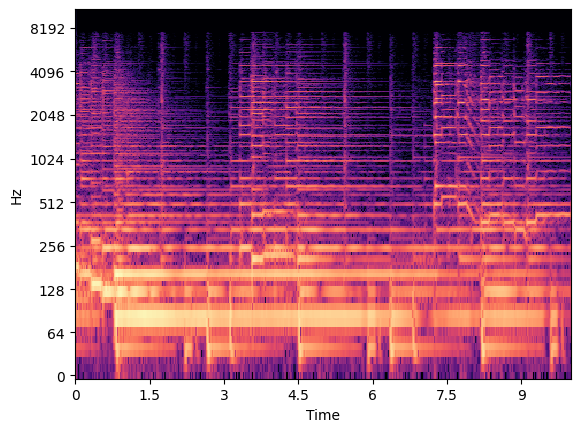

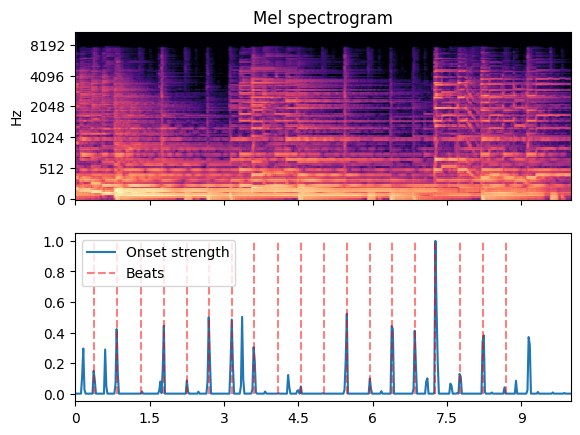

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

audio_name = 'test.wav'
hop_length = 512
window_size = 2048

import librosa
y, sr = librosa.load(audio_name)    #y=time series(one-dimensional NumPy floating point array), sr= sampling rate of y, that is, the number of samples per second of audio. By default, all audio is mixed to mono and resampled to 22050 Hz at load time
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length, window=window)
out = 2 * np.abs(out) / np.sum(window)

import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), y_axis='log', x_axis='time')

''' To store spectrogram
from matplotlib.backends.backend_agg import FigureCanvasAgg
fig = plt.figure()
canvas = FigureCanvasAgg(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
fig.savefig('C:\\Users\\USER\\Desktop\\Songs\\spec.png')
'''

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max), y_axis='mel', x_axis='time', hop_length=hop_length, ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()
plt.show()

In [9]:
M.shape

(128, 431)

TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given